# Time Series 

### DATA_SET:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from   pylab import  rcParams 
from   datetime import  datetime, timedelta
import warnings
warnings.filterwarnings('ignore')



Analytics firm wants to forecast the Price of Mindtree Ltd. stock for the month of Dec 2021. For this, firm has gathered a Closing Stock Price data for the period of Dec 2020 to Nov 2021.

In [2]:
df = pd.read_csv('data.csv',parse_dates=['Date'])
df.head()

,Date,Closing
0,04-12-2020,1411.60
1,07-12-2020,1414.30
2,08-12-2020,1441.70
3,09-12-2020,1437.95
4,10-12-2020,1442.70


In [3]:
df.tail()

,Date,Closing
254,25-11-2021,4576.55
255,26-11-2021,4597.90
256,29-11-2021,4625.55
257,30-11-2021,4547.35
258,01-12-2021,4591.05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     259 non-null    object 
 1   Closing  259 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [5]:
df.isnull().sum()

Date       0
Closing    0
dtype: int64

<Axes: >

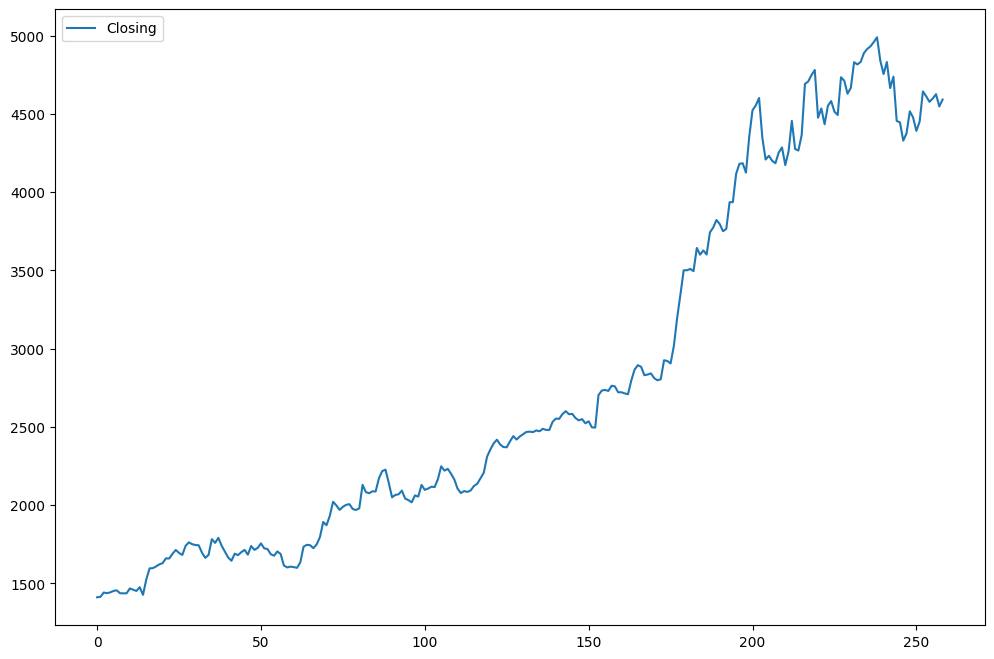

In [6]:
rcParams['figure.figsize'] = 12,8
df.plot()

In [7]:
from pandas.tseries.offsets import BDay

date = pd.date_range(start='04/12/2020',end='01/12/2021',freq=BDay())
date[0:263]

DatetimeIndex(['2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-20', '2020-04-21', '2020-04-22',
               '2020-04-23', '2020-04-24',
               ...
               '2020-12-30', '2020-12-31', '2021-01-01', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-11', '2021-01-12'],
              dtype='datetime64[ns]', length=197, freq='B')

In [8]:
date = pd.date_range(start='1/1/2018', end='4/10/2019', freq='D')
date

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08',
               '2019-04-09', '2019-04-10'],
              dtype='datetime64[ns]', length=465, freq='D')

In [9]:
df['Timestamp'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.set_index('Timestamp')
df=df.drop('Date',axis=1)
df

,Closing
Timestamp,
2020-12-04,1411.60
2020-12-07,1414.30
2020-12-08,1441.70
2020-12-09,1437.95
2020-12-10,1442.70
...,...
2021-11-25,4576.55
2021-11-26,4597.90
2021-11-29,4625.55


In [10]:
df.isnull().sum()

Closing    0
dtype: int64

<Axes: xlabel='Timestamp'>

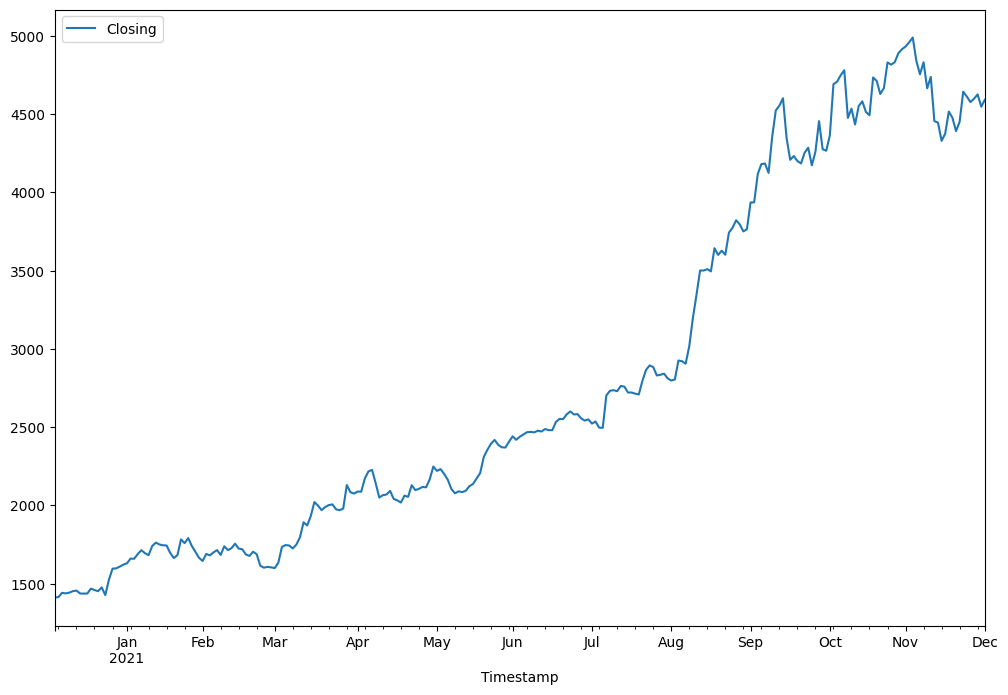

In [11]:
df.plot()

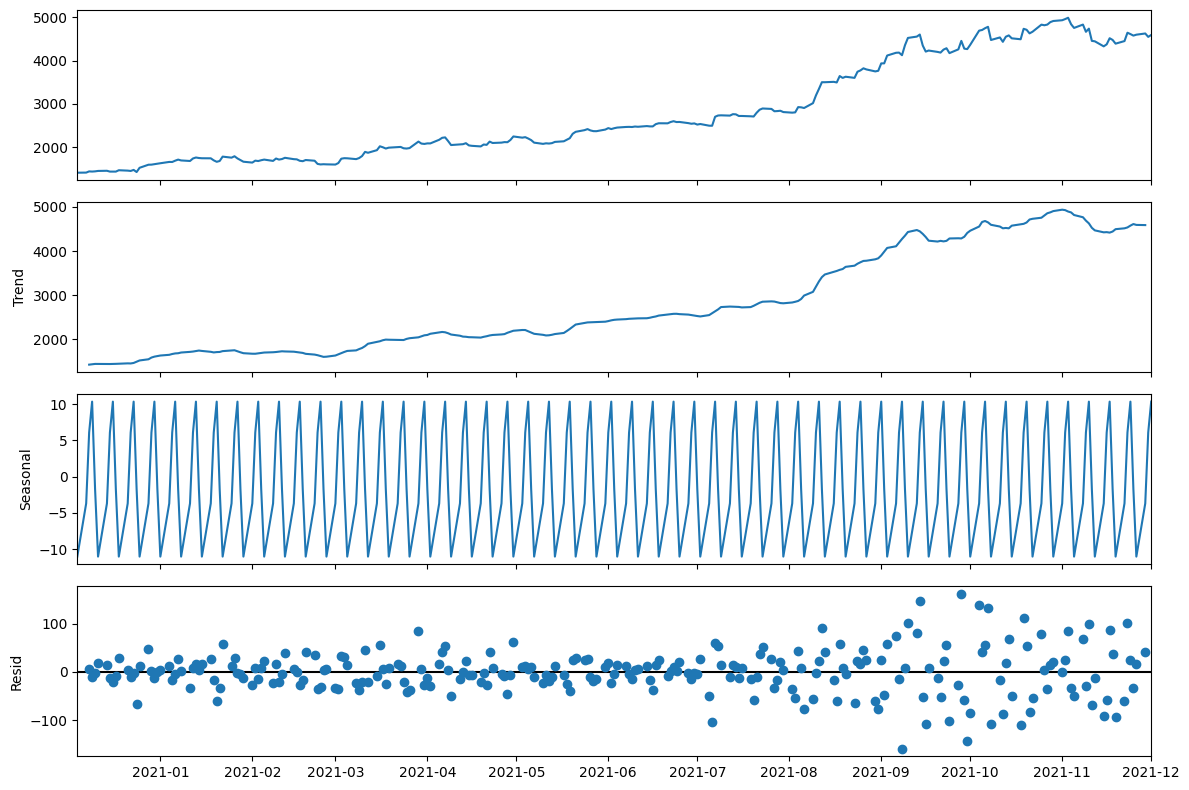

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df,model='additive')
decomposition.plot()
plt.show()

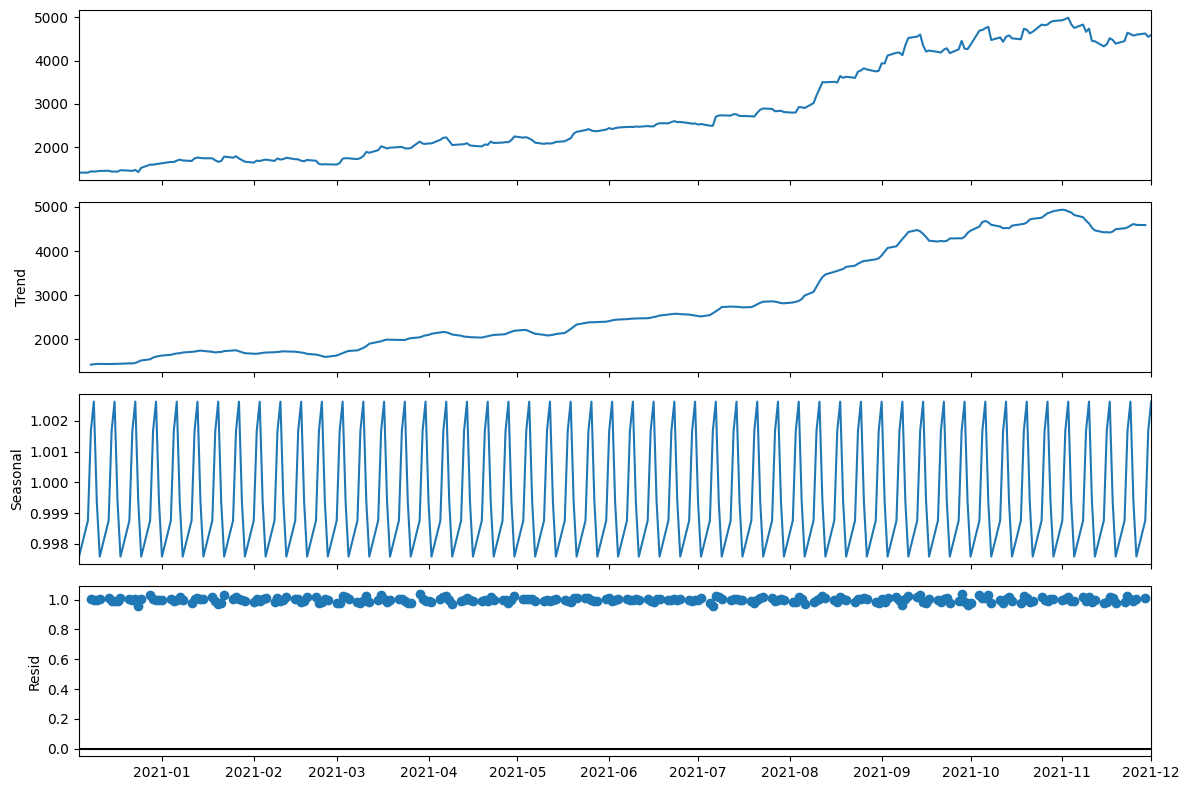

In [13]:
decomposition = seasonal_decompose(df,model='multipicative')
decomposition.plot()
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller

observation = df.values
test_series = adfuller(observation)
test_series

(-0.007528997627653315,
 0.9579049966158177,
 0,
 258,
 {'1%': -3.455952927706342,
  '5%': -2.8728086526320302,
  '10%': -2.572774990685656},
 2770.616012349057)

In [15]:
df_diff = df.diff(periods=1).dropna()
observations = df_diff.values
test_result = adfuller(observations)
test_result

(-15.394908823574543,
 3.272634107458135e-28,
 0,
 257,
 {'1%': -3.4560535712549925,
  '5%': -2.8728527662442334,
  '10%': -2.5727985212493754},
 2759.816026154356)

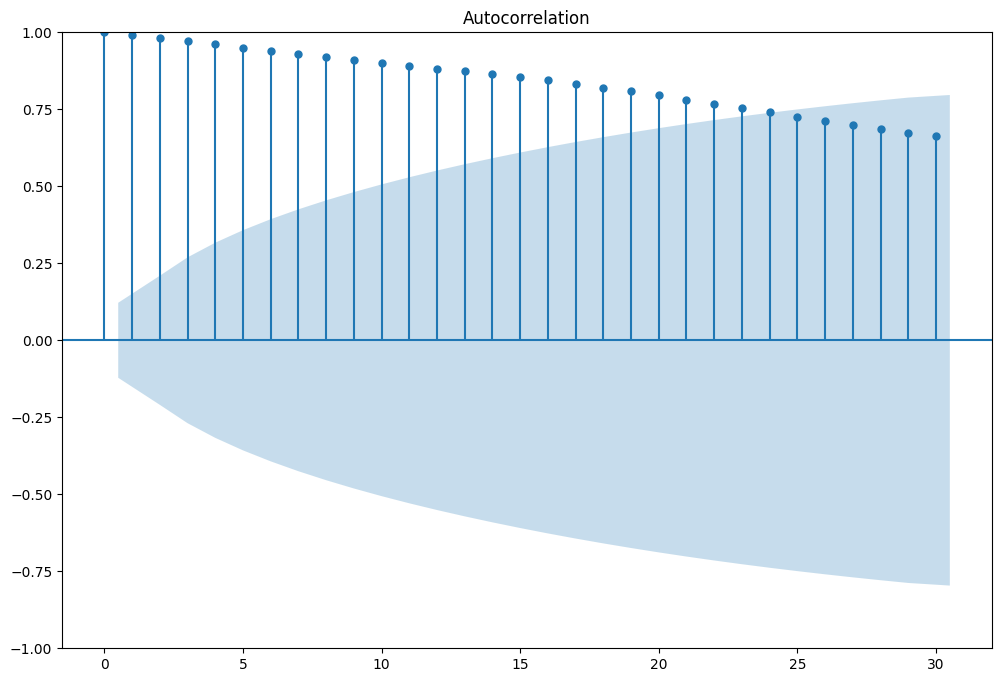

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(df,lags=30)
plt.show()

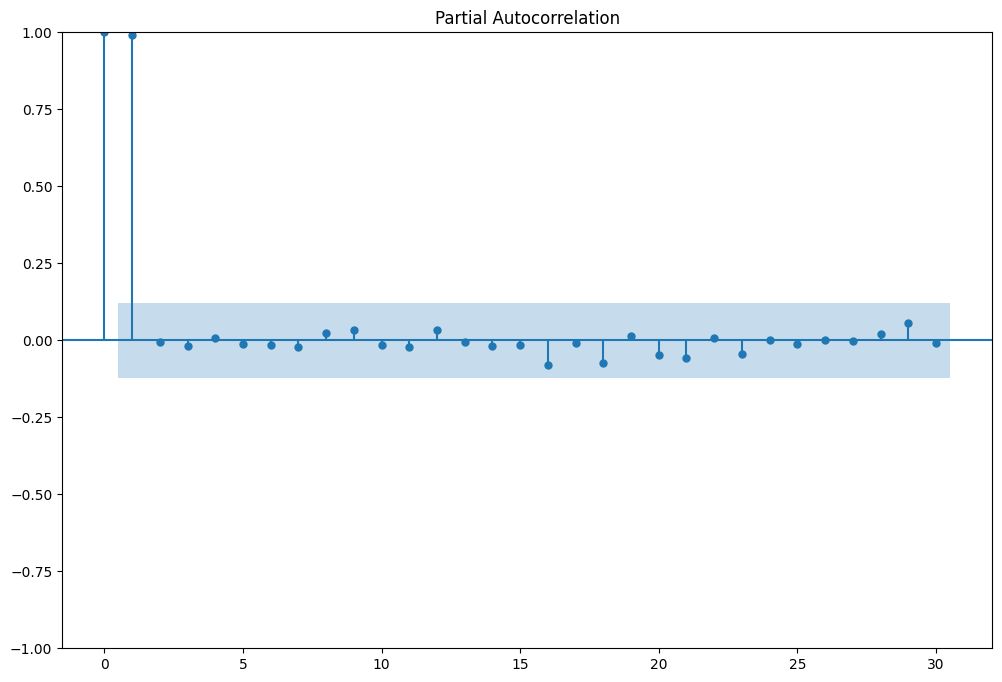

In [17]:
plot_pacf(df,lags=30)
plt.show()

In [18]:
df.head(),df.tail()

(            Closing
 Timestamp          
 2020-12-04  1411.60
 2020-12-07  1414.30
 2020-12-08  1441.70
 2020-12-09  1437.95
 2020-12-10  1442.70,
             Closing
 Timestamp          
 2021-11-25  4576.55
 2021-11-26  4597.90
 2021-11-29  4625.55
 2021-11-30  4547.35
 2021-12-01  4591.05)

In [19]:
train_end = datetime(2021,9,30)
test_end = datetime(2021,12,1)
train = df[:train_end]
test = df[train_end+timedelta(days=1):test_end]


In [20]:
train.shape,test.shape

((215, 1), (44, 1))

In [21]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

p = q = range(0,4)
d = range(0,2)
pdq = list(itertools.product(p,d,q))
print('combination of parameters')
for i in range(1,len(pdq)):
    print(f"model: {i} {pdq[i]}")

combination of parameters
model: 1 (0, 0, 1)
model: 2 (0, 0, 2)
model: 3 (0, 0, 3)
model: 4 (0, 1, 0)
model: 5 (0, 1, 1)
model: 6 (0, 1, 2)
model: 7 (0, 1, 3)
model: 8 (1, 0, 0)
model: 9 (1, 0, 1)
model: 10 (1, 0, 2)
model: 11 (1, 0, 3)
model: 12 (1, 1, 0)
model: 13 (1, 1, 1)
model: 14 (1, 1, 2)
model: 15 (1, 1, 3)
model: 16 (2, 0, 0)
model: 17 (2, 0, 1)
model: 18 (2, 0, 2)
model: 19 (2, 0, 3)
model: 20 (2, 1, 0)
model: 21 (2, 1, 1)
model: 22 (2, 1, 2)
model: 23 (2, 1, 3)
model: 24 (3, 0, 0)
model: 25 (3, 0, 1)
model: 26 (3, 0, 2)
model: 27 (3, 0, 3)
model: 28 (3, 1, 0)
model: 29 (3, 1, 1)
model: 30 (3, 1, 2)
model: 31 (3, 1, 3)


In [22]:
dfobj = pd.DataFrame(columns=['Param','AIC'])
dfobj


,Param,AIC


In [23]:
for param in pdq:
    try:
        mod = ARIMA(train,order=param)
        result_arim = mod.fit()
        print(f"ARIMA: {param} AIC {result_arim.aic}")
        dfobj = dfobj.append({'param':param,"AIC":result_arim.aic})
    except Exception as e:
        continue

ARIMA: (0, 0, 0) AIC 3508.520065305625


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\s

ARIMA: (0, 0, 1) AIC 3240.764073065261


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA: (0, 0, 2) AIC 3011.801497708395


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA: (0, 0, 3) AIC 2997.1633730706544
ARIMA: (0, 1, 0) AIC 2362.35747848156
ARIMA: (0, 1, 1) AIC 2357.065688732158
ARIMA: (0, 1, 2) AIC 2359.0594371690004


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\s

ARIMA: (0, 1, 3) AIC 2361.0038190609102
ARIMA: (1, 0, 0) AIC 2383.6499458328108


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\s

ARIMA: (1, 0, 1) AIC 2378.302710981315


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA: (1, 0, 2) AIC 2380.293207213085


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA: (1, 0, 3) AIC 2382.229365115232
ARIMA: (1, 1, 0) AIC 2357.1783413673697
ARIMA: (1, 1, 1) AIC 2359.0579246001203


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\s

ARIMA: (1, 1, 2) AIC 2355.771631565633


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA: (1, 1, 3) AIC 2357.434446020272
ARIMA: (2, 0, 0) AIC 2378.3940777838325


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\s

ARIMA: (2, 0, 1) AIC 2385.990633197751


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\dkewa\AppData\Local\Programs\Py

ARIMA: (2, 0, 2) AIC 2378.5110113223013
ARIMA: (2, 0, 3) AIC 2380.7574170662606
ARIMA: (2, 1, 0) AIC 2359.091594092353


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\s

ARIMA: (2, 1, 1) AIC 2361.039845121307


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA: (2, 1, 2) AIC 2357.543124867111


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA: (2, 1, 3) AIC 2352.6418597410056


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA: (3, 0, 0) AIC 2380.3215669536576


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA: (3, 0, 1) AIC 2379.2206183604503


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\dkewa\AppData\Local\Programs\Py

ARIMA: (3, 0, 2) AIC 2380.237266053538
ARIMA: (3, 0, 3) AIC 2380.5569975004382
ARIMA: (3, 1, 0) AIC 2360.8867077198092


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\s

ARIMA: (3, 1, 1) AIC 2357.3214263988248


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\dkewa\AppData\Local\Programs\Py

ARIMA: (3, 1, 2) AIC 2353.1330600030633
ARIMA: (3, 1, 3) AIC 2354.1455380039324


c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
dfobj.sort_values(by=['AIC'])

,Param,AIC


In [25]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(train,order=(3,1,3))
result_arima = model.fit()
print(result_arim.summary())

c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Closing   No. Observations:                  215
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1170.073
Date:                Wed, 02 Oct 2024   AIC                           2354.146
Time:                        22:57:44   BIC                           2377.707
Sample:                    12-04-2020   HQIC                          2363.667
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5883      0.284     -2.069      0.039      -1.146      -0.031
ar.L2         -0.9006      0.199     -4.521      0.000      -1.291      -0.510
ar.L3          0.1262      0.285      0.443      0.6

c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
arima_prediction = result_arim.forecast(len(test))

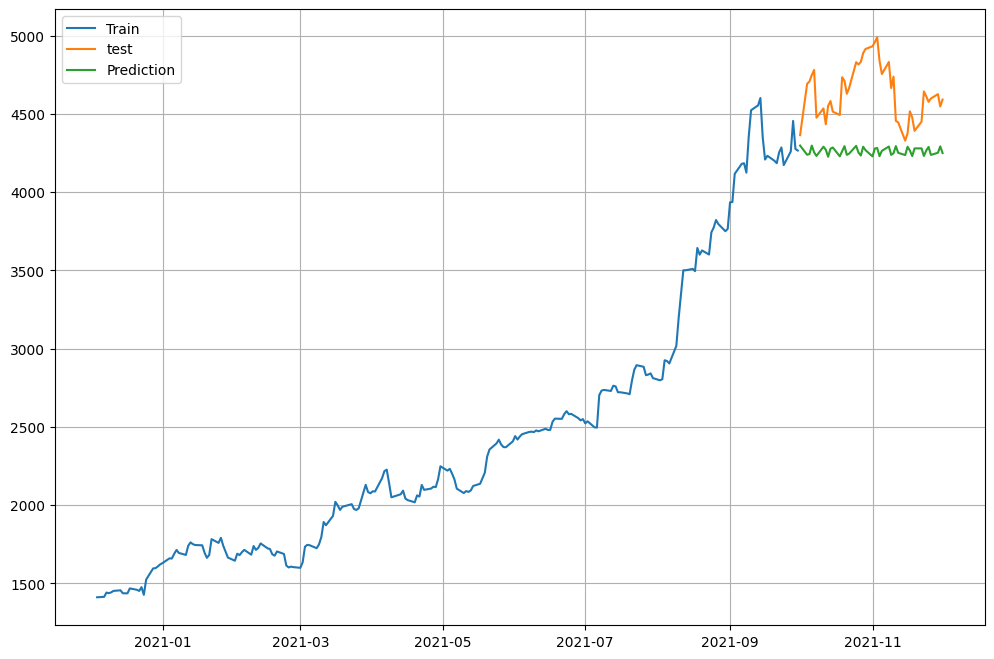

In [27]:
plt.plot(train,label = 'Train')
plt.plot(test,label="test")
plt.plot(test.index,arima_prediction, label = "Prediction")
plt.legend(loc='best')
plt.grid()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(test['Closing'],arima_prediction,squared=False)
print(rmse)

417.9183374655949


In [29]:
def mape(y_true,y_pred):
    return np.mean((np.abs(y_true-y_pred))/y_true)*100

mape = mape(test['Closing'].values,arima_prediction[0])
print(f"these were the trend that model were not able to acapture: {mape}")

these were the trend that model were not able to acapture: 7.292550061250173


In [30]:
from statsmodels.tsa.api import  ExponentialSmoothing

model_tes = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_tes = model_tes.fit(optimized=True)
print(model_tes.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Closing   No. Observations:                  215
Model:             ExponentialSmoothing   SSE                         777924.507
Optimized:                         True   AIC                           1779.656
Trend:                         Additive   BIC                           1809.991
Seasonal:                      Additive   AICC                          1780.956
Seasonal Periods:                     5   Date:                 Wed, 02 Oct 2024
Box-Cox:                          False   Time:                         22:57:45
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9545800                alpha                 True
smoothing_trend          

c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [31]:
tes_prediction = model_tes.forecast(len(test))

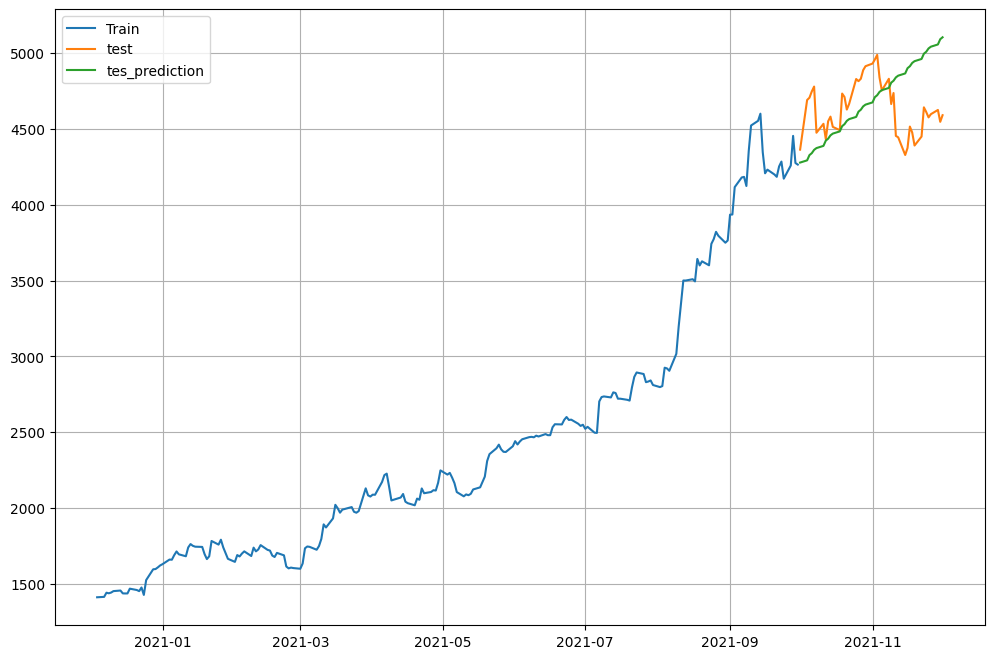

In [32]:
plt.plot(train,label='Train')
plt.plot(test,label='test')
plt.plot(test.index,tes_prediction,label='tes_prediction')
plt.grid()
plt.legend(loc='best')
plt.show()

In [33]:
rmse_tes = mean_squared_error(test['Closing'],tes_prediction,squared=False)
print(f"RMSE: {rmse_tes}")

RMSE: 322.0496341616281


In [34]:
def mape(y_true,y_pred):
    return np.mean((np.abs(y_true-y_pred))/y_true)*100

mape_tes = mape(test['Closing'].values,tes_prediction.values)
print(f"these were the trends that not captured: {mape_tes}")

these were the trends that not captured: 5.930970094360233


In [35]:
model_tes = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_tes = model_tes.fit()
print(model_tes.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Closing   No. Observations:                  215
Model:             ExponentialSmoothing   SSE                         777924.507
Optimized:                         True   AIC                           1779.656
Trend:                         Additive   BIC                           1809.991
Seasonal:                      Additive   AICC                          1780.956
Seasonal Periods:                     5   Date:                 Wed, 02 Oct 2024
Box-Cox:                          False   Time:                         22:57:45
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9545800                alpha                 True
smoothing_trend          

c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [36]:
residuals = test['Closing'].values-tes_prediction.values

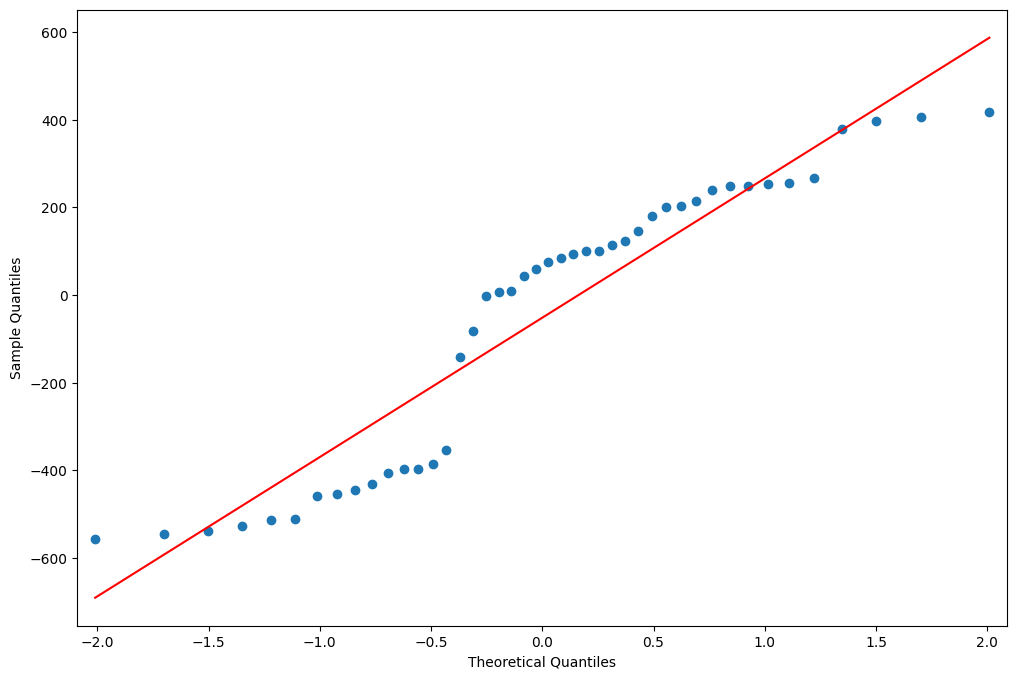

In [37]:
from statsmodels.graphics.gofplots import qqplot

qqplot(residuals,line='s')
plt.show()

In [38]:
model_final = ExponentialSmoothing(df,trend='additive',seasonal='additive',initialization_method='estimated')
model_final = model_final.fit()
print(model_final.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Closing   No. Observations:                  259
Model:             ExponentialSmoothing   SSE                        1366983.753
Optimized:                         True   AIC                           2237.964
Trend:                         Additive   BIC                           2269.975
Seasonal:                      Additive   AICC                          2239.033
Seasonal Periods:                     5   Date:                 Wed, 02 Oct 2024
Box-Cox:                          False   Time:                         22:57:46
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9542524                alpha                 True
smoothing_trend          

c:\Users\dkewa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [39]:
forecast_final = model_final.forecast(40)

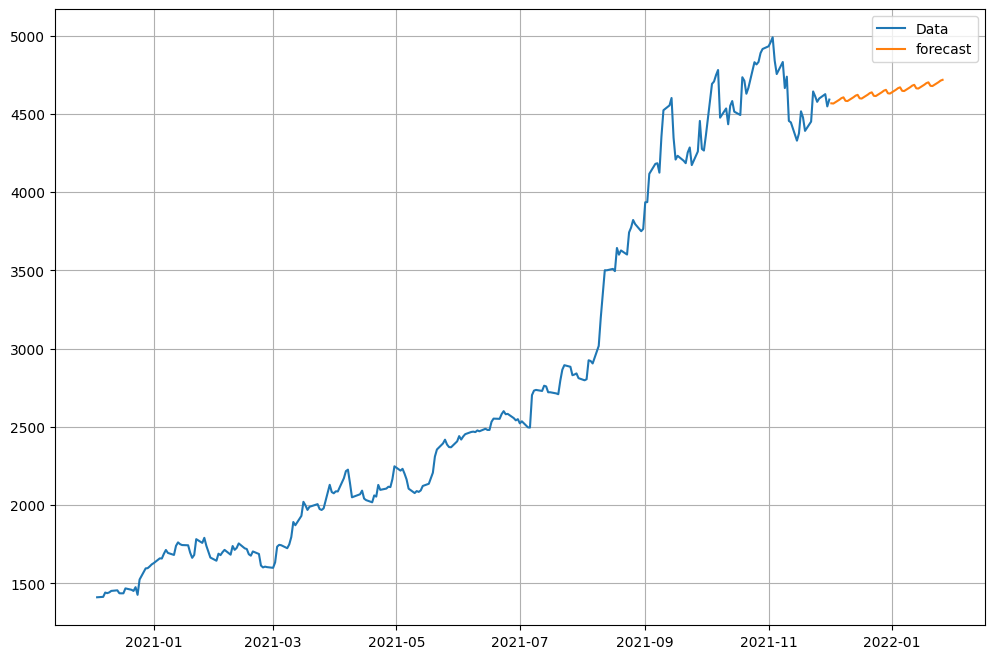

In [40]:
plt.plot(df,label='Data')
plt.plot(forecast_final,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()


#### END